In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.PauliZ(1))

In [3]:
params = np.array([0.1, 0.2], requires_grad=True)
print("Expectation value of circuit:", circuit(params))

Expectation value of circuit: 0.9751703272018161


Drawing of circuit:

(<Figure size 500x300 with 1 Axes>, <Axes: >)


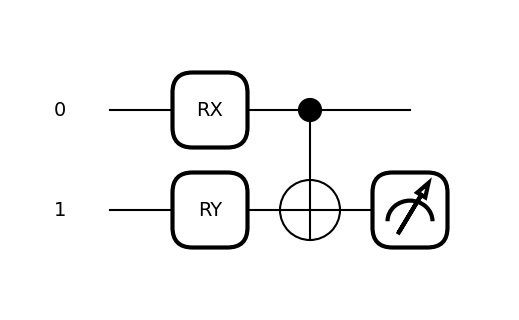

In [5]:
print("Drawing of circuit:\n")
print(qml.draw_mpl(circuit)(params))

In [9]:
opt = qml.GradientDescentOptimizer(stepsize=0.01)

iterations = 100

costs = []

for _ in range(iterations):
    params, cost = opt.step_and_cost(circuit, params)
    costs.append(cost)


Minimized circuit output: -0.9999999215488692
Optimized parameters: [1.79012316e-04 3.14123930e+00]


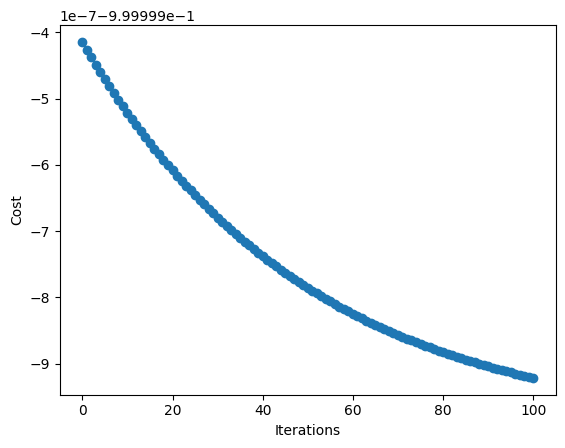

In [10]:
import matplotlib.pyplot as plt

costs.append(circuit(params))
plt.plot(costs, "-o")
plt.xlabel("Iterations")
plt.ylabel("Cost")

print("Minimized circuit output:", circuit(params))
print("Optimized parameters:", params)